Ian Soede, Nicolas Salvan

# Control theory and Vicsek Model 

## Introduction

---
In this file, you will find data visualisation of different simulations. 

## Library import

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from IPython.display import Video, display


In [3]:
# Import models 
import models.vicsek as vicsek
import visualisation as visualisation
import utils
import animation.Animator2D as Animator2D
import animation.MatplotlibAnimator as MatplotlibAnimator

In [4]:
def import_bib():
    import models.vicsek as vicsek
    import visualisation as visualisation
    import utils
    import animation.Animator2D as Animator2D
    import animation.MatplotlibAnimator as MatplotlibAnimator
import_bib()
    

## 0. Lauching a simulation

In [5]:
# Initialize the Vicsek model.
radius = 2
L = 50
simulator = vicsek.Vicsek(domainSize=(L, L), radius=radius)
# Simulate the Vicsek model.
simulationData = simulator.simulate()

# Extract the simulation data.
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]

In [6]:
df = utils.simulationDataToDataframe(simulationData)
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_145,theta_y_145,theta_x_146,theta_y_146,theta_x_147,theta_y_147,theta_x_148,theta_y_148,theta_x_149,theta_y_149
0,0.0,6.044271,24.959583,32.594613,15.059032,21.550528,38.962134,39.025060,8.072374,32.051940,...,0.630422,-0.776253,-0.970610,-0.240658,0.778924,0.627118,-0.993551,0.113385,0.770615,-0.637300
1,0.5,6.048316,25.459567,32.816658,15.507022,21.076055,38.804415,38.793404,8.515472,31.579085,...,0.407359,-0.913268,-0.904697,-0.426057,0.893799,0.448469,-0.944829,-0.327564,-0.355169,-0.934802
2,1.0,5.918624,25.942454,32.895670,16.000740,20.685259,38.492519,38.611171,8.981080,31.093034,...,0.669174,-0.743106,-0.923751,-0.382994,0.299953,0.953954,-0.995724,0.092378,-0.197253,-0.980353
3,1.5,5.716130,26.399615,33.008706,16.487795,20.248672,38.248816,38.955062,9.344039,30.603460,...,0.318623,-0.947882,-0.793580,-0.608465,0.150808,0.988563,-0.963258,0.268577,-0.074187,-0.997244
4,2.0,5.528728,26.863167,32.896202,16.974974,19.752801,38.312946,39.383054,9.085538,30.142706,...,-0.346710,-0.937972,-0.718157,-0.695881,-0.699140,0.714985,-0.999828,0.018552,0.204577,-0.978850


### Animation of the simulation

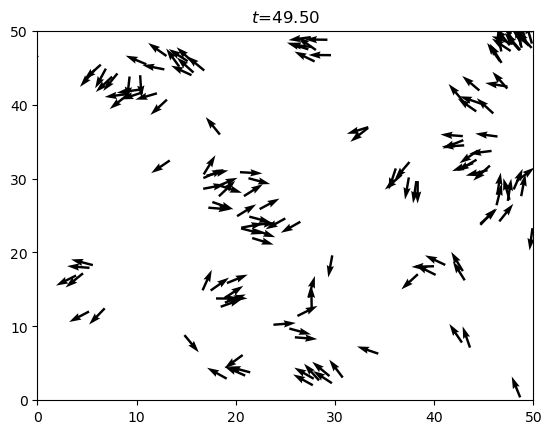

In [7]:
# Initialize the Matplotanimator and feed the simulation data and domain size.
animator = MatplotlibAnimator.MatplotlibAnimator(simulationData, (50,50))
# Prepare the animator for a 2D representation.
preparedAnimator = animator.prepare(Animator2D.Animator2D())
preparedAnimator.saveAnimation('data/vicsek3.mp4')

In [8]:
display(Video('data/vicsek3.mp4', embed=False))

## Part 1 : Bird path 

### Bird position over time

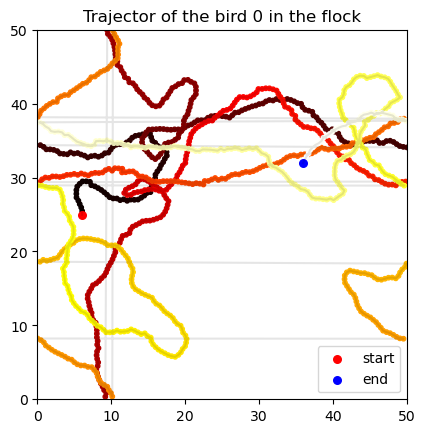

In [9]:
fig, ax = visualisation.plot_bird_path(df, 0)
# fig.savefig('data/bird_path.png')

### Bird orientation over time 

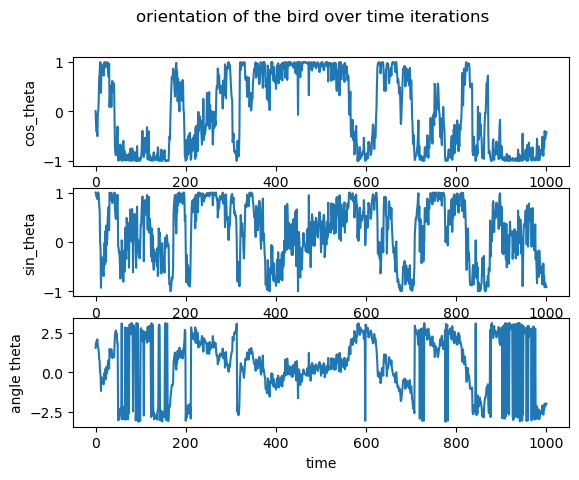

In [10]:
# TEST
fig, axs = visualisation.plot_bird_orientation(df, 0)
fig.savefig('data/bird_orientation.png')

### Phase portrait of orientation 

In [11]:
# TODO 

### Highlight a bird in a video, trajectory in the video 

In [12]:
## TODO but seems useless so I'll do it last

## 2. Controller plots

In [13]:
## TO DO 

## 3. Plot the simulation at some time 

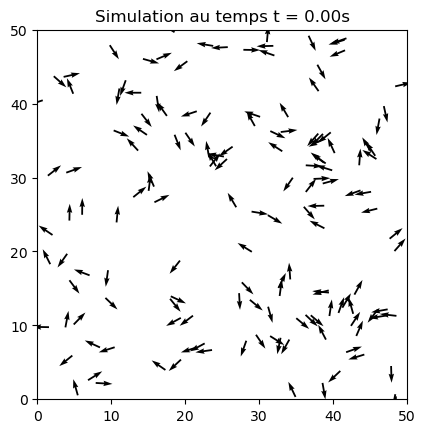

In [14]:
fig, ax = visualisation.plot_simulation(df, 0, 50)
# fig.savefig('data/simulation_t_0.png')

## 4. Average behaviour of the flock

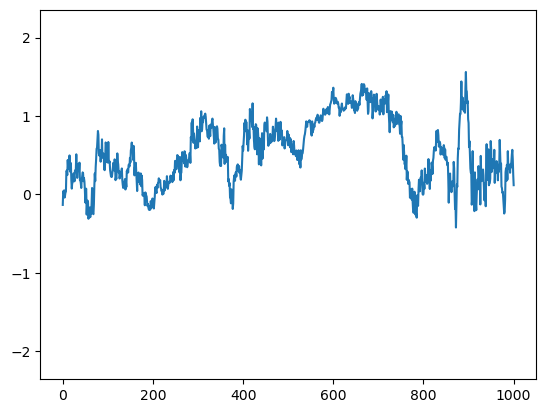

In [15]:
angle_mean = utils.average_orientation(df)
plt.plot(angle_mean)
plt.ylim(-0.75*np.pi, 0.75*np.pi)
plt.show()

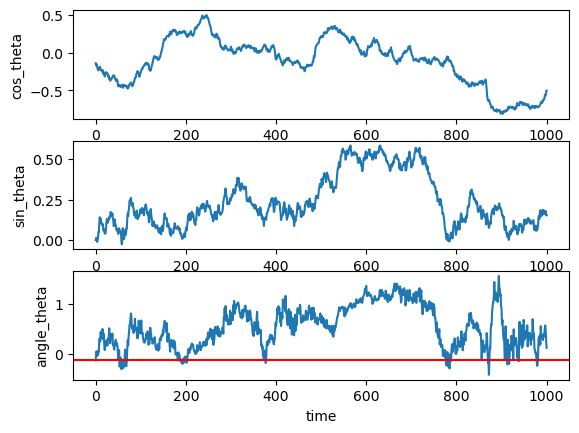

In [16]:
fig, axs = visualisation.plot_average_orientation(df)
fig.savefig('data/average_orientation.png')

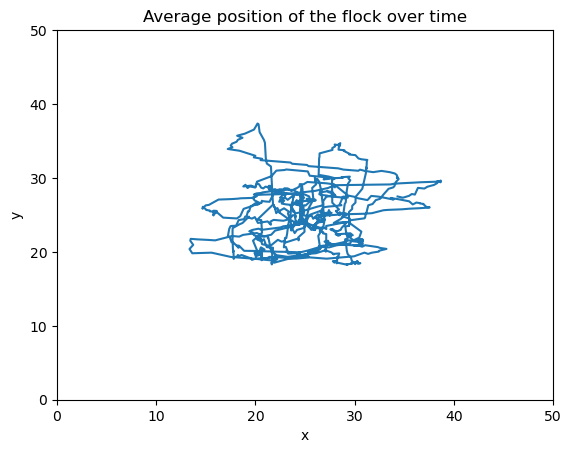

In [17]:
# def plot_average_position(df, L=50):
#     # Compute the average position of the flock over time.
#     df_pos = utils.extract_positions_from_dataframe(df)
#     x = df_pos.filter(like="x").to_numpy()
#     y = df_pos.filter(like="y").to_numpy()
#     x_mean = np.mean(x, axis=1)
#     y_mean = np.mean(y, axis=1)

#     # Plot the average position of the flock over time.
#     fig, ax = plt.subplots()
#     ax.plot(x_mean, y_mean)
#     ax.set_title('Average position of the flock over time')
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_xlim(0, L)
#     ax.set_ylim(0, L)
#     plt.show()

#     return fig, ax

fig, ax = visualisation.plot_average_position(df)
fig.savefig('data/average_position.png')


## 5. Order factor and other coefficients 

In [18]:
# TESTS 
utils.order_factor(df)
print(utils.stationnary_order_factor(df), "Stationnary Order Factor")


0.4034993882301789 Stationnary Order Factor


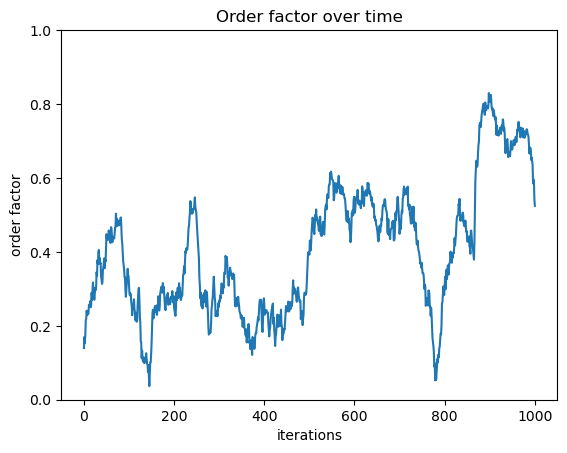

In [19]:

# def plot_order_factor(df):
#     order = utils.order_factor(df)
#     fig, ax = plt.subplots()
#     ax.plot(order)
#     plt.title('Order factor over time')
#     plt.xlabel('iterations')
#     plt.ylabel('order factor')
#     plt.ylim(0, 1)
#     plt.show()

#     return fig, ax

    

fig, ax = visualisation.plot_order_factor(df)
fig.savefig('data/order_factor.png')



In [20]:
from scipy import integrate
from numba import jit

In [21]:
def binder_cumulant(df):
    tmax = df['t'].iloc[-1]
    order = utils.order_factor(df)
    x = np.linspace(0, tmax, len(order))
    phi2 = integrate.simpson(order*order, x=x) 
    phi4 = integrate.simpson(order**4, x=x)
    return 1 - phi4 / (3 * phi2**2)


In [22]:
# N = 50
# noise = np.linspace(0., np.pi, N)
# binder_data = []
# stat_order_data = []
# for noise_amplitude in noise : 
#     print(noise_amplitude)
#     simulator = vicsek.Vicsek(domainSize=(L, L), radius=radius, noiseAmplitude=noise_amplitude)
#     # Simulate the Vicsek model.
#     simulationData = simulator.simulate()
#     df = utils.simulationDataToDataframe(simulationData)
#     binder = binder_cumulant(df)
#     binder_data.append(binder)
#     stat_order_data.append(utils.stationnary_order_factor(df))


In [24]:
# # derivative of the order factor
# deriv = np.gradient(stat_order_data, noise)
# fig, ax = plt.subplots()
# plt.plot(noise, deriv*deriv)
# # point at max
# max_idx = np.argmax(deriv*deriv)
# plt.scatter(noise[max_idx], deriv[max_idx]*deriv[max_idx], c = 'red', label=f'Max: {noise[max_idx]:.2f}')
# plt.title('Squared derivative of the order factor')
# plt.xlabel('Noise amplitude')
# plt.ylabel('Squared derivative')
# plt.legend()
# plt.show()
# fig.savefig('data/derivative_order_factor.png')


We can see that there is a critical point, which shows a change in the order of the system. 

In [26]:
# fig, axs = plt.subplots(2)
# axs[0].plot(noise, stat_order_data)
# axs[0].scatter(noise[max_idx], stat_order_data[max_idx], c = 'red', label=f'Critical point: {noise[max_idx]:.2f}')
# axs[1].plot(noise, binder_data)
# axs[1].scatter(noise[max_idx], binder_data[max_idx], c = 'red')
# axs[0].set_title('Stationnary order factor', fontsize=9)
# axs[1].set_title('Binder cumulant', fontsize=9)
# fig.legend()
# plt.show()

# fig.savefig('data/binder_cumulant_crit.png')

In [27]:
# store in csv 
binder_df = pd.DataFrame({'noise': noise, 'binder': binder_data, 'stationnary_order': stat_order_data, 'derivative': deriv})
binder_df.to_csv('data/binder.csv', index=False)

NameError: name 'noise' is not defined